## Introduction

The project aims to set up a linear regression model to predict house prices and use intelligible analysis to draw conclusions about which feature variables are important in determining house prices. Data comes from the Housing Prices dataset. 

Acknowledgement:

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

| Variable | Description | Type |
| :- | :- | :- |
| price | Property price in USD | float |
| area | Area of the house | float |
| bedrooms | Number of bedrooms | integer |
| bathrooms | Number of bathrooms | integer |
| stories | Number of stories | integer |
| mainroad | Is house on the main road | boolean |
| guestroom | Does house have guestroom | boolean |
| basement | Does house have basement | boolean |
| hotwaterheating | Does house have hotwaterheating | boolean |
| airconditioning | Does house have arconditioning | boolean |
| parking | How many parking spots | integer |
| furnishingstatus | What is the furnishing status | categorical |

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df = df.replace({'yes': 1, 'no': 0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Data transformation of categorical data.

In [5]:
# encoding furnish status in dataset
furnishing_status = ['unfurnished', 'semi-furnished', 'furnished']
ct = ColumnTransformer(transformers=[
                            ('ordinal', OrdinalEncoder(categories=[furnishing_status]), ['furnishingstatus'])],
                            remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['unfurnished',
                                                             'semi-furnished',
                                                             'furnished']]),
                                 ['furnishingstatus'])])

In [6]:
transformed_data = ct.fit_transform(df)
feature_names = ct.get_feature_names_out()
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
transformed_df.head()

,ordinal__furnishingstatus,remainder__price,remainder__area,remainder__bedrooms,remainder__bathrooms,remainder__stories,remainder__mainroad,remainder__guestroom,remainder__basement,remainder__hotwaterheating,remainder__airconditioning,remainder__parking,remainder__prefarea
0,2.0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
1,2.0,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
2,1.0,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3,2.0,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0
4,2.0,11410000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0


## Model setup

Distinguishing between explanatory variables and target variable

In [7]:
import sklearn

import shap

X = transformed_df.iloc[:, [0] + list(range(2,13))]
y = transformed_df.iloc[:, 1]


In [8]:
X

,ordinal__furnishingstatus,remainder__area,remainder__bedrooms,remainder__bathrooms,remainder__stories,remainder__mainroad,remainder__guestroom,remainder__basement,remainder__hotwaterheating,remainder__airconditioning,remainder__parking,remainder__prefarea
0,2.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
1,2.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
2,1.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3,2.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0
4,2.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
541,1.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0.0,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
543,2.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's plot some density functions of the explanatory variables to see their distributions. Some are binary which results in two humps and others have more categories.

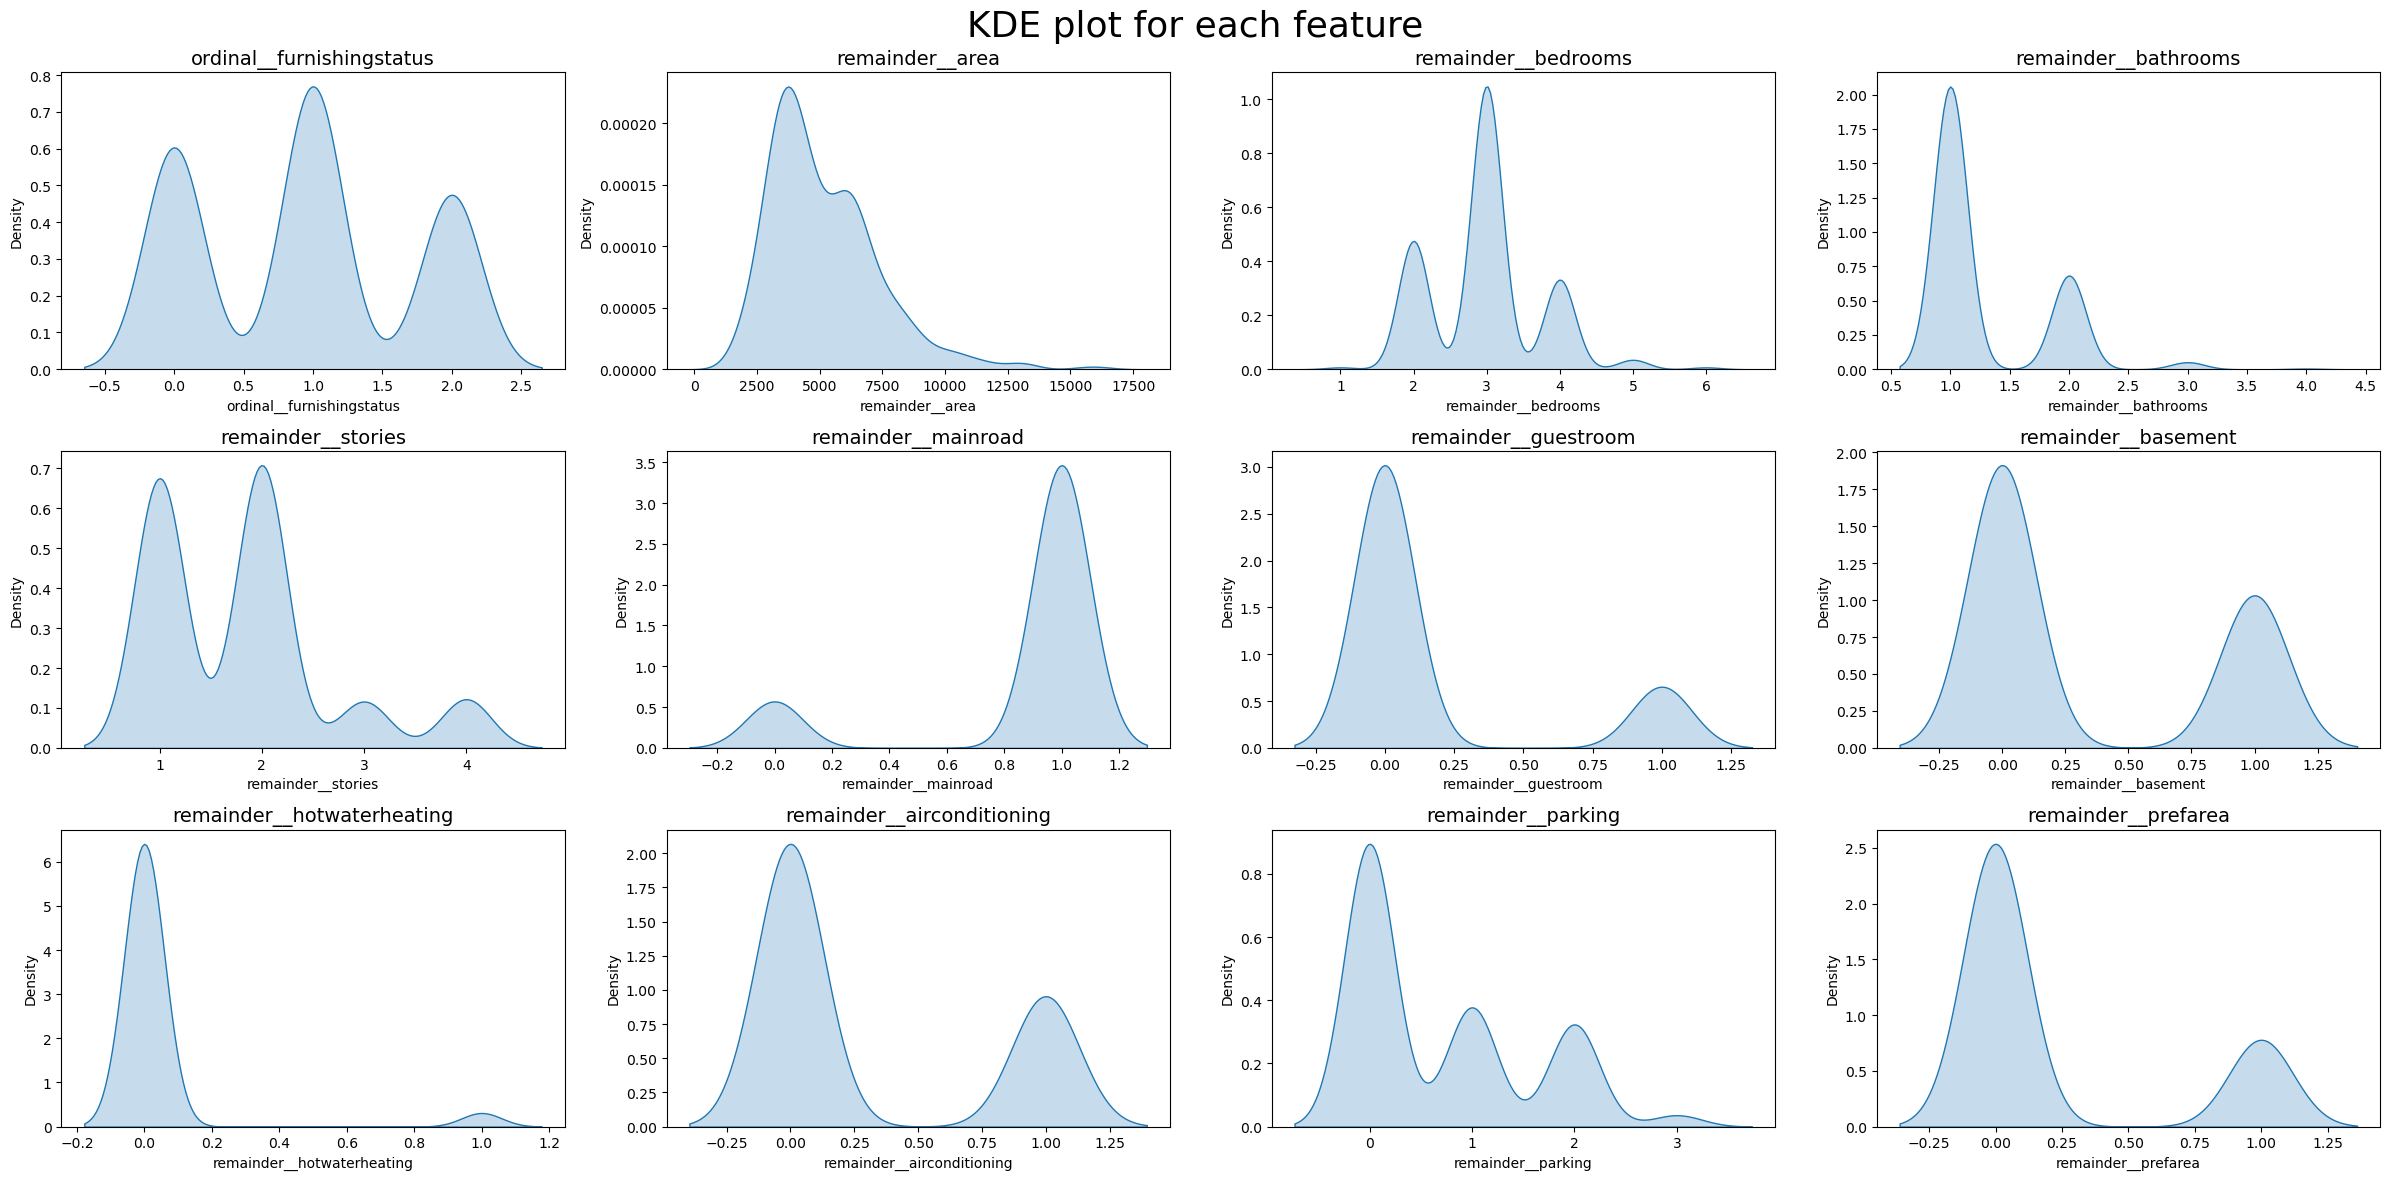

In [9]:
import math
num_columns = len(X.columns)
num_rows = 3
num_cols_per_row = math.ceil(num_columns / num_rows)

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(6 * num_cols_per_row, 4 * num_rows))
fig.suptitle('KDE plot for each feature', fontsize=26)

# Ensure axes is iterable
if num_rows * num_cols_per_row == 1:  # Single plot case
    axes = [axes]
elif num_rows == 1 or num_cols_per_row == 1:  # Single row/column case
    axes = axes.flatten()
else:
    axes = axes.ravel()

# Iterate through each numeric column and create KDE plots
for idx, col in enumerate(X.columns):
    sns.kdeplot(data=X, x=col, ax=axes[idx], fill=True)
    axes[idx].set_title(f"{col}", fontsize=14)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Density")

for ax in axes[num_columns:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Let's check how the correlation looks like among all the features in the dataset.

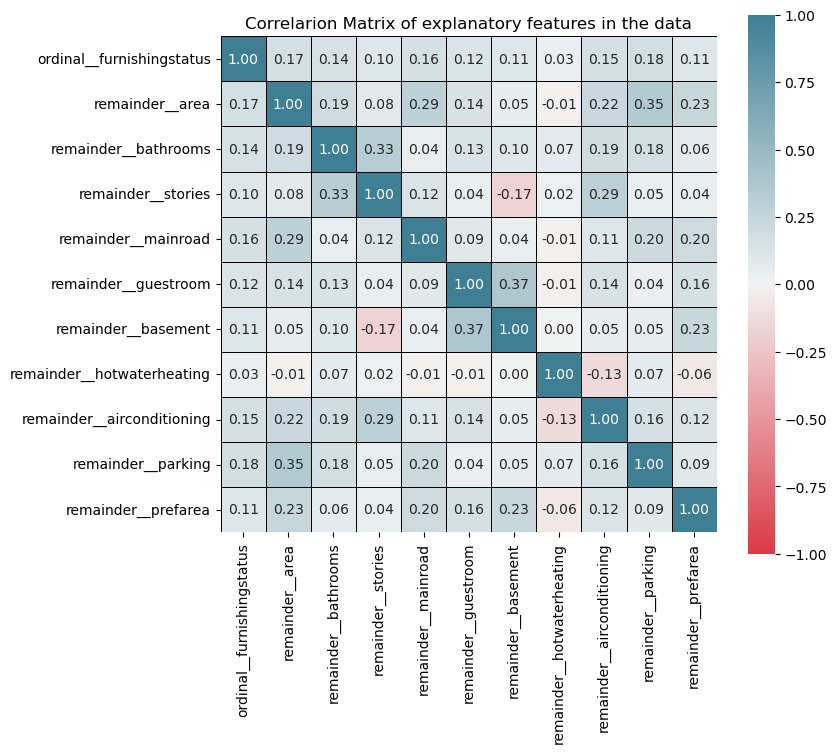

In [23]:
corr_mat = X.corr()

fig, ax = plt.subplots(figsize=(8, 7))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(
    data=corr_mat, 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.2f',
    ax=ax
)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
ax.set_xticklabels(ax.get_yticklabels(), horizontalalignment='center')
ax.set(title='Correlarion Matrix of explanatory features in the data');

The correlation matrix does not reveal significantly high positive or negative correlation among the features, so we keep them from modelling.

Let's set up a simple linear regression and look at the results

In [10]:
import statsmodels.api as sm
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:       remainder__price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          3.81e-123
Time:                        14:34:23   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

We adjust the regression as the bedroom feature appears not to be statistically significant. The adjusted R2 remains at just above 0.67 and all features are statistically significant.

In [11]:
X = X.drop('remainder__bedrooms', axis=1)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       remainder__price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     102.2
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          1.40e-123
Time:                        14:34:23   Log-Likelihood:                -8334.4
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     533   BIC:                         1.674e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [12]:
X = transformed_df.iloc[:, [0] + list(range(2,13))]
X = X.drop('remainder__bedrooms', axis=1)
y = transformed_df.iloc[:, 1]
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

ordinal__furnishingstatus = 216987.6984
remainder__area = 247.06024
remainder__bathrooms = 1026884.35405
remainder__stories = 487539.50066
remainder__mainroad = 394465.18296
remainder__guestroom = 293050.49729
remainder__basement = 383161.17303
remainder__hotwaterheating = 880183.64569
remainder__airconditioning = 851457.55595
remainder__parking = 286628.53072
remainder__prefarea = 650894.80812


## Model visualization

Visualization of the relationship between the area feature and the target variable: price. There is a clear positive association between the house area.

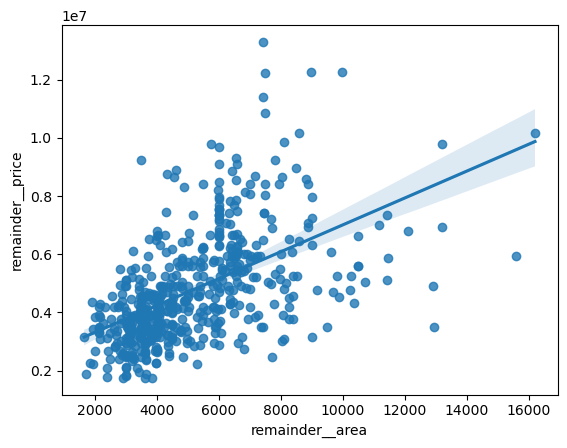

In [19]:
sns.regplot(x="remainder__area", 
            y="remainder__price", 
            data=transformed_df);


The below plot shows the relative importance of the features to the model. It gives the absolute mean shap value for each feature over the entire dataset. Features with larger shap values are making a larger contribution to the model.

PermutationExplainer explainer: 546it [00:22, 13.21it/s]                       


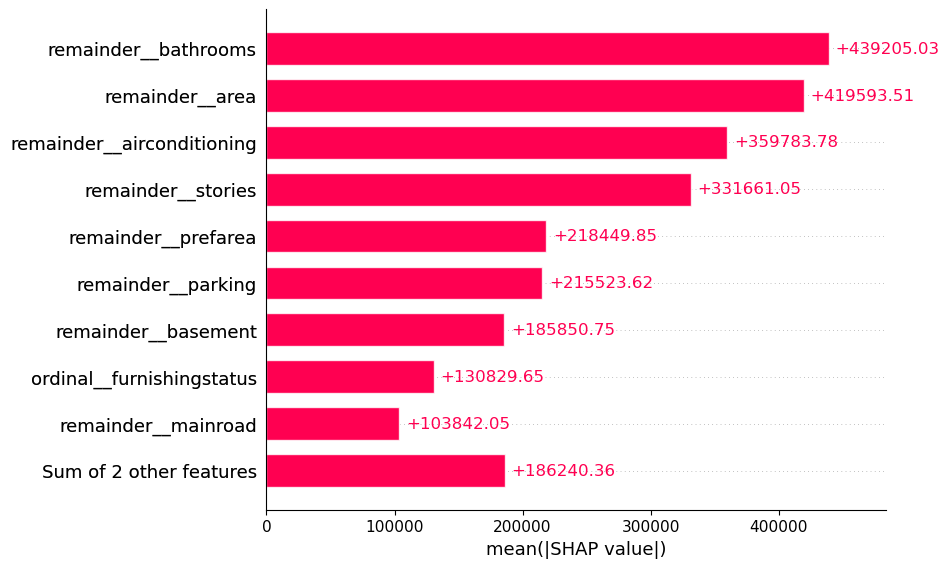

In [24]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.bar(shap_values)

The below visualization shows the relative importance of features in the dataset. Each observation is shown as a single dot. Higher positive values are red and larger negative values are blue. The x position of the dot is determined by the SHAP value of that feature, and dots cluster along each feature row to show density. We see that all features are categorical except for area which is numeric. All variables also go from blue to red in the rightward direction, indicating a positive correlation to the target variable.
In the below plot the number of bathrooms and area are the most important features in determining house prices while the number of guestrooms and whether or not the property has hotwater heating appear least important.

PermutationExplainer explainer: 546it [00:27, 15.18it/s]                       


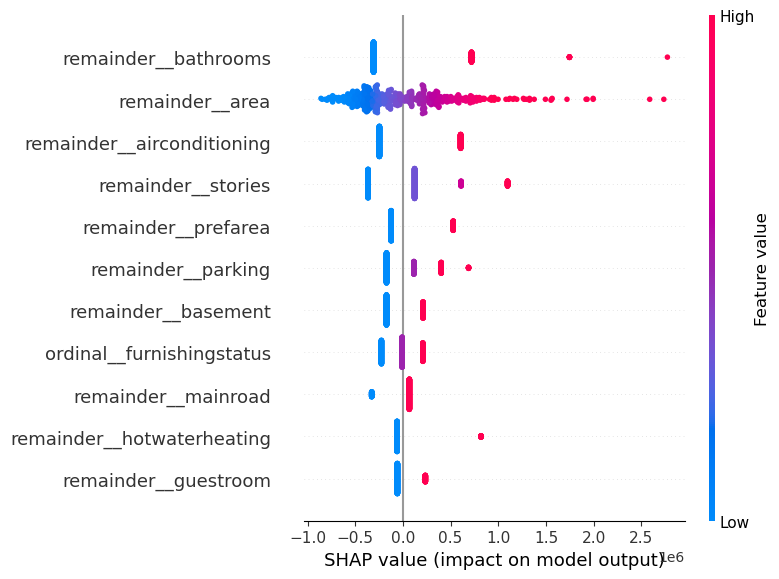

In [14]:
shap.summary_plot(shap_values, X)

The below plot illustrates how each feature contributes in explaining the 25th observation. The actual house price is 854k USD and going from the baseline expectation of 475k USD, whichis the average prediction of the model across all samples, each feature except for hotwater heating contributes positively, to the final model prediction of this instance at 813k USD. Bathrooms and airconditioning have the most strong impact of the features.

Actual y value: 8540000.0


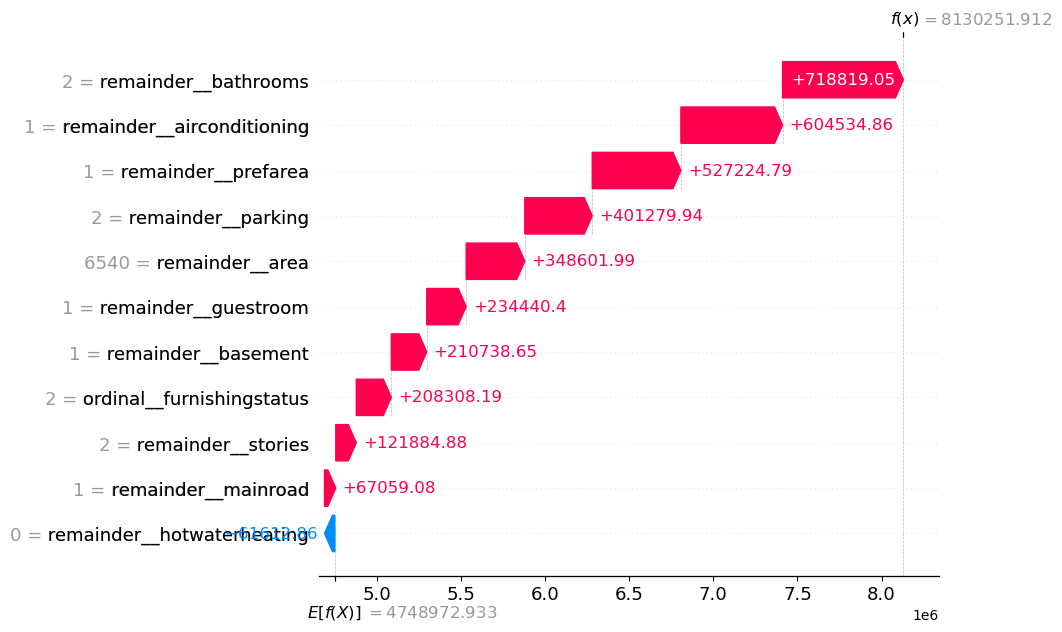

In [18]:
OBSERVATION = 25
print(f"Actual y value: {y.iloc[OBSERVATION]}")
shap.plots.waterfall(shap_values[OBSERVATION], max_display=20)

The partial dependence plot shows the relationship between "area" and the model's predictions, averaged over the other features.
The SHAP value for the chosen sample is visualized as the difference between the model's average output (expected value) and the predicted value for that sample when "area" is set to its observed value.
The SHAP value for "Area" quantifies how much the feature contributes to the difference between the model's output for that sample and the expected output. This aligns with the value shown on the PDP where the feature is fixed at its observed value.

Thus in the plot, for the 25th observation, the area is 6,540 (x-axis location of red line), which is larger than the global average area in the dataset (5,150, marked by vertical dashed grey line). For the 25th observation the area feature positively contributes by 348k to a model expectation of the target of 5,10 mn (4,75 mn + 348k, black dot).

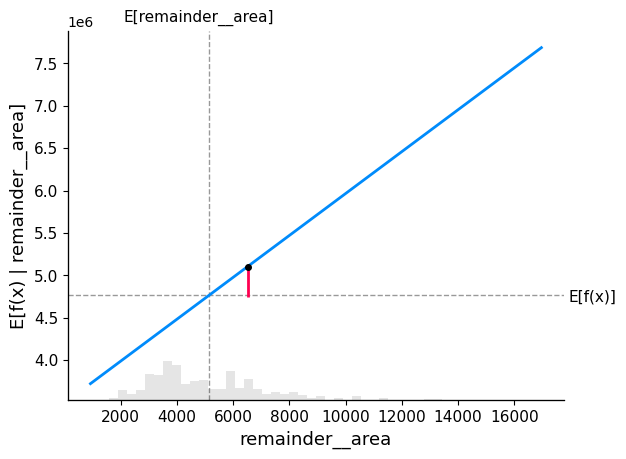

In [16]:
shap.partial_dependence_plot(
    "remainder__area",
    model.predict,
    X,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[OBSERVATION : OBSERVATION + 1, :],
)